In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import os
import math
from datetime import datetime

# 列出資料檔案

In [2]:
#檔案位置
path='D:\\福壽_產學資料\\製粒機_可用資料\\0727\\'
file_list = os.listdir(path)
file_list

['2020072700_clear.json',
 '2020072701_clear.json',
 '2020072702_clear.json',
 '2020072703_clear.json',
 '2020072704_clear.json',
 '2020072705_clear.json',
 '2020072706_clear.json',
 '2020072707_clear.json',
 '2020072708_clear.json',
 '2020072709_clear.json',
 '2020072710_clear.json',
 '2020072711_clear.json',
 '2020072712_clear.json',
 '2020072713_clear.json',
 '2020072714_clear.json',
 '2020072715_clear.json',
 '2020072716_clear.json',
 '2020072717_clear.json',
 '2020072718_clear.json',
 '2020072719_clear.json',
 '2020072720_clear.json',
 '2020072721_clear.json',
 '2020072722_clear.json',
 '2020072723_clear.json']

# 檔案讀取成df

In [3]:
df_origin = pd.read_json(path+file_list[1])
df_origin

,Timestamp,Z1,Z2
0,2020-07-27 00:58:00,0.268555,1.699219
1,2020-07-27 00:58:00,0.258789,1.691895
2,2020-07-27 00:58:00,0.250244,1.691895
3,2020-07-27 00:58:00,0.258789,1.688232
4,2020-07-27 00:58:00,0.258789,1.691895
...,...,...,...
1140033,2020-07-27 01:58:00,0.261230,1.694336
1140034,2020-07-27 01:58:00,0.252686,1.699219
1140035,2020-07-27 01:58:00,0.261230,1.691895
1140036,2020-07-27 01:58:00,0.261230,1.691895


# 取出分鐘資料

In [4]:
#將分鐘存入list
list_timestamp=[]

for i in df_origin['Timestamp']:
    if not(i in list_timestamp):
        list_timestamp.append(i)
list_timestamp

[Timestamp('2020-07-27 00:58:00'),
 Timestamp('2020-07-27 00:59:00'),
 Timestamp('2020-07-27 01:00:00'),
 Timestamp('2020-07-27 01:01:00'),
 Timestamp('2020-07-27 01:02:00'),
 Timestamp('2020-07-27 01:03:00'),
 Timestamp('2020-07-27 01:04:00'),
 Timestamp('2020-07-27 01:05:00'),
 Timestamp('2020-07-27 01:06:00'),
 Timestamp('2020-07-27 01:07:00'),
 Timestamp('2020-07-27 01:08:00'),
 Timestamp('2020-07-27 01:09:00'),
 Timestamp('2020-07-27 01:10:00'),
 Timestamp('2020-07-27 01:11:00'),
 Timestamp('2020-07-27 01:12:00'),
 Timestamp('2020-07-27 01:13:00'),
 Timestamp('2020-07-27 01:14:00'),
 Timestamp('2020-07-27 01:15:00'),
 Timestamp('2020-07-27 01:16:00'),
 Timestamp('2020-07-27 01:17:00'),
 Timestamp('2020-07-27 01:18:00'),
 Timestamp('2020-07-27 01:19:00'),
 Timestamp('2020-07-27 01:20:00'),
 Timestamp('2020-07-27 01:21:00'),
 Timestamp('2020-07-27 01:22:00'),
 Timestamp('2020-07-27 01:23:00'),
 Timestamp('2020-07-27 01:24:00'),
 Timestamp('2020-07-27 01:25:00'),
 Timestamp('2020-07-

In [5]:
#取出一分鐘資料

In [6]:
df_min = df_origin.loc[df_origin['Timestamp'] == '2020-07-27 00:58:00']
df_min

,Timestamp,Z1,Z2
0,2020-07-27 00:58:00,0.268555,1.699219
1,2020-07-27 00:58:00,0.258789,1.691895
2,2020-07-27 00:58:00,0.250244,1.691895
3,2020-07-27 00:58:00,0.258789,1.688232
4,2020-07-27 00:58:00,0.258789,1.691895
...,...,...,...
9993,2020-07-27 00:58:00,0.263672,1.688232
9994,2020-07-27 00:58:00,0.273438,1.688232
9995,2020-07-27 00:58:00,0.240479,1.691895
9996,2020-07-27 00:58:00,0.263672,1.683350


In [7]:
df_min.shape

(9998, 3)

In [8]:
#rem 餘數，取1~60之間生成與餘數一樣多的點，方便下方知道哪幾秒要多加比數。
rem = df_min.shape[0]%60
sec_space = np.linspace(1, 60, rem)
print(sec_space)

[ 1.          2.59459459  4.18918919  5.78378378  7.37837838  8.97297297
 10.56756757 12.16216216 13.75675676 15.35135135 16.94594595 18.54054054
 20.13513514 21.72972973 23.32432432 24.91891892 26.51351351 28.10810811
 29.7027027  31.2972973  32.89189189 34.48648649 36.08108108 37.67567568
 39.27027027 40.86486486 42.45945946 44.05405405 45.64864865 47.24324324
 48.83783784 50.43243243 52.02702703 53.62162162 55.21621622 56.81081081
 58.40540541 60.        ]


In [9]:
#將餘數位置轉換成整數。
sec_list = []
for i in sec_space:
    sec_list.append(math.floor(i))
print(sec_list)

[1, 2, 4, 5, 7, 8, 10, 12, 13, 15, 16, 18, 20, 21, 23, 24, 26, 28, 29, 31, 32, 34, 36, 37, 39, 40, 42, 44, 45, 47, 48, 50, 52, 53, 55, 56, 58, 60]


In [10]:
min_count = df_min.shape[0]
print(min_count)
count = min_count/60
print(count)
sec_count = []
for i in range(60):
    sec_count.append(math.floor(count))
print(sec_count)

9998
166.63333333333333
[166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166]


In [11]:
for i in sec_list:
    sec_count[i-1] = sec_count[i-1]+1
print(sec_count)

[167, 167, 166, 167, 167, 166, 167, 167, 166, 167, 166, 167, 167, 166, 167, 167, 166, 167, 166, 167, 167, 166, 167, 167, 166, 167, 166, 167, 167, 166, 167, 167, 166, 167, 166, 167, 167, 166, 167, 167, 166, 167, 166, 167, 167, 166, 167, 167, 166, 167, 166, 167, 167, 166, 167, 167, 166, 167, 166, 167]


In [12]:
# sec_count.insert(0,0)
# print(sec_count)

In [13]:
#製作 min:sec Timestamp 
sec_Timestamp = []
sec_Z1_mean = []
sec_Z2_mean = []
for i in range(60):
    if i<10:
        sec = '0'+str(i)
        sec_Timestamp.append('2020-07-27 00:58:'+sec)
    else:
        sec_Timestamp.append('2020-07-27 00:58:'+str(i))
print(sec_Timestamp)

['2020-07-27 00:58:00', '2020-07-27 00:58:01', '2020-07-27 00:58:02', '2020-07-27 00:58:03', '2020-07-27 00:58:04', '2020-07-27 00:58:05', '2020-07-27 00:58:06', '2020-07-27 00:58:07', '2020-07-27 00:58:08', '2020-07-27 00:58:09', '2020-07-27 00:58:10', '2020-07-27 00:58:11', '2020-07-27 00:58:12', '2020-07-27 00:58:13', '2020-07-27 00:58:14', '2020-07-27 00:58:15', '2020-07-27 00:58:16', '2020-07-27 00:58:17', '2020-07-27 00:58:18', '2020-07-27 00:58:19', '2020-07-27 00:58:20', '2020-07-27 00:58:21', '2020-07-27 00:58:22', '2020-07-27 00:58:23', '2020-07-27 00:58:24', '2020-07-27 00:58:25', '2020-07-27 00:58:26', '2020-07-27 00:58:27', '2020-07-27 00:58:28', '2020-07-27 00:58:29', '2020-07-27 00:58:30', '2020-07-27 00:58:31', '2020-07-27 00:58:32', '2020-07-27 00:58:33', '2020-07-27 00:58:34', '2020-07-27 00:58:35', '2020-07-27 00:58:36', '2020-07-27 00:58:37', '2020-07-27 00:58:38', '2020-07-27 00:58:39', '2020-07-27 00:58:40', '2020-07-27 00:58:41', '2020-07-27 00:58:42', '2020-07-2

In [14]:
#將取出一秒的資料進行平均存入sec_Z1_mean跟sec_Z2_mean
sec_Z1_max = []
sec_Z1_min = []
sec_Z2_max = []
sec_Z2_min = []
for i in range(0,60):
    if i == 0:
        df_sec = df_min[0:sum(sec_count[0:1])]
        #print(df_sec)
        sec_Z1_max.append(np.max(df_sec['Z1']))
        sec_Z2_max.append(np.max(df_sec['Z2']))
        sec_Z1_min.append(np.min(df_sec['Z1']))
        sec_Z2_min.append(np.min(df_sec['Z2']))
        
        sec_Z1_mean.append(np.mean(df_sec['Z1']))
        sec_Z2_mean.append(np.mean(df_sec['Z2']))
    else:
        df_sec = df_min[sum(sec_count[0:i]):sum(sec_count[0:i+1])]
        sec_Z1_max.append(np.max(df_sec['Z1']))
        sec_Z2_max.append(np.max(df_sec['Z2']))
        sec_Z1_min.append(np.min(df_sec['Z1']))
        sec_Z2_min.append(np.min(df_sec['Z2']))
        
        sec_Z1_mean.append(np.mean(df_sec['Z1']))
        sec_Z2_mean.append(np.mean(df_sec['Z2']))
        #print(df_sec)
print(sec_Z1_mean)
print(sec_Z2_mean)
min_Z1_max = np.max(sec_Z1_max)
min_Z1_min = np.min(sec_Z1_min)
min_Z2_max = np.max(sec_Z2_max)
min_Z2_min = np.min(sec_Z2_min)

[0.26025829200973055, 0.25899373128742514, 0.25936999952936746, 0.2578241953592814, 0.2587817529004491, 0.2607083607868976, 0.25982702563622756, 0.26003900402320357, 0.25803163827183734, 0.2637742093937126, 0.2587890625, 0.2620783822979042, 0.2604556511976048, 0.26095103068524095, 0.2620564534992515, 0.2583431769273952, 0.25728892131024095, 0.260441031998503, 0.26083337255271083, 0.26090884636976047, 0.25891332569236525, 0.26042156908885544, 0.25976854883982037, 0.25900104088697606, 0.2598185711596386, 0.2603240784056886, 0.25843608810240964, 0.2597539296407186, 0.2599659080276946, 0.26117899331701805, 0.25968814324476047, 0.2611939207522455, 0.2579360410391566, 0.25903027928517963, 0.25843608810240964, 0.2607187967814371, 0.25974662004116766, 0.2582963690700301, 0.26110620555763475, 0.26117930155314373, 0.26078189711972893, 0.2585112977170659, 0.26040686182228917, 0.2595419512537425, 0.2601486480164671, 0.26059070265436746, 0.26169097352170656, 0.25903758888473055, 0.25963473032756024

In [15]:
sec_point = pd.DataFrame()
sec_point['Timestamp'] = sec_Timestamp
sec_point['Z1'] = sec_Z1_mean
sec_point['Z2'] = sec_Z2_mean
sec_point['Z1_max'] = sec_Z1_max
sec_point['Z1_min'] = sec_Z1_min
sec_point['Z2_max'] = sec_Z2_max
sec_point['Z2_min'] = sec_Z2_min
#sec_point

In [16]:
sec_Z1_max_min = np.linspace(min_Z1_min,min_Z1_max,5)
print(sec_Z1_max_min)

sec_Z1_max_min = np.insert(sec_Z1_max_min,0,sec_Z1_max_min[0]-(sec_Z1_max_min[1]-sec_Z1_max_min[0]))
sec_Z1_max_min = np.append(sec_Z1_max_min,2*sec_Z1_max_min[-1]-sec_Z1_max_min[-2])

print(sec_Z1_max_min.max())
print(sec_Z1_max_min.min())

print(sec_Z1_max_min)

[0.14160156 0.19866943 0.2557373  0.31280518 0.36987305]
0.42694091796875
0.08453369140625
[0.08453369 0.14160156 0.19866943 0.2557373  0.31280518 0.36987305
 0.42694092]


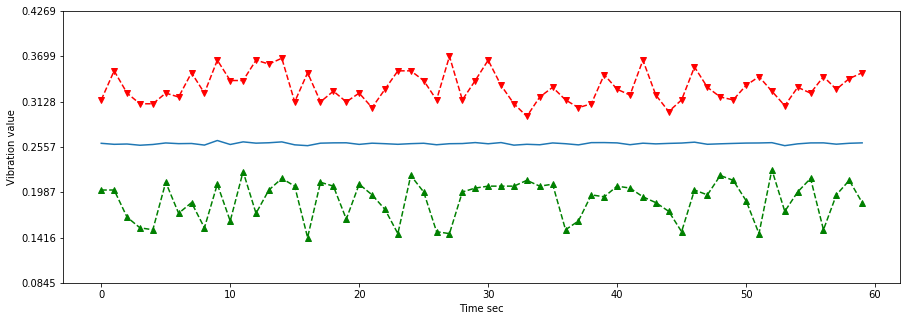

In [31]:
#change size
plt.figure(figsize=(15,5))
#plot
sec_point['Z1'].plot(yticks=sec_Z1_max_min,label= 'mean')
sec_point['Z1_max'].plot(yticks=sec_Z1_max_min,color='red',ls = 'dashed',marker='v',label='max')
sec_point['Z1_min'].plot(yticks=sec_Z1_max_min,color='green',ls = 'dashed',marker='^',label='min')
plt.xlabel('Time sec')
plt.ylabel('Vibration value')
#plt.savefig('D:\\福壽_產學資料\\製粒機_可用資料\\0727_Z1\\2020_07_27_00_58.png')
plt.show()

In [18]:
sec_Z2_max_min = np.linspace(min_Z2_min,min_Z2_max,5)
print(sec_Z2_max_min)

sec_Z2_max_min = np.insert(sec_Z2_max_min,0,sec_Z2_max_min[0]-(sec_Z2_max_min[1]-sec_Z2_max_min[0]))
sec_Z2_max_min = np.append(sec_Z2_max_min,2*sec_Z2_max_min[-1]-sec_Z2_max_min[-2])

print(sec_Z2_max_min.max())
print(sec_Z2_max_min.min())

print(sec_Z2_max_min)

[1.53808594 1.60247803 1.66687012 1.73126221 1.7956543 ]
1.86004638671875
1.47369384765625
[1.47369385 1.53808594 1.60247803 1.66687012 1.73126221 1.7956543
 1.86004639]


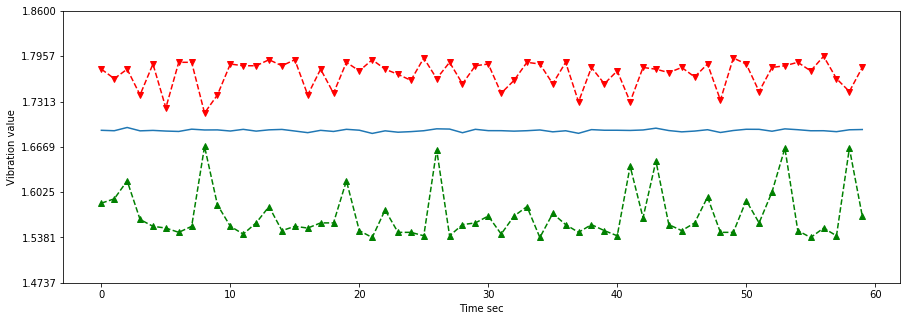

In [19]:
#change size
plt.figure(figsize=(15,5))
#plot
sec_point['Z2'].plot(yticks=sec_Z2_max_min)
sec_point['Z2_max'].plot(yticks=sec_Z2_max_min,color='red',ls = 'dashed',marker='v')
sec_point['Z2_min'].plot(yticks=sec_Z2_max_min,color='green',ls = 'dashed',marker='^')
plt.xlabel('Time sec')
plt.ylabel('Vibration value')
#plt.savefig('D:\\福壽_產學資料\\製粒機_可用資料\\0727_Z2\\2020_07_27_00_58.png')
plt.show()